In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Seleccionar el archivo de datos con el que se quiere trabajar y convertirlo en un DataFrame

Se disponen de dos archivos, los cuales pueden usarse como datos de entrada para la simulación y que corresponden a las rutas de vuelo: 

 - Bogota - Buenos Aires
 - New York - Tokio

In [2]:
print("Lista con los archivos de datos de entrada: \n muestra_h_BOG-BAS-esfera7m_phantom86cm-1s1.csv \n muestra_h_NY-T-esfera7m_phantom86cm-1s1.csv")

Lista con los archivos de datos de entrada: 
 muestra_h_BOG-BAS-esfera7m_phantom86cm-1s1.csv 
 muestra_h_NY-T-esfera7m_phantom86cm-1s1.csv


In [3]:
# Seleccionar el archivo
while True:
    datos = input('Seleccionar archivo de datos:')
    try: 
        if datos == "muestra_h_BOG-BAS-esfera7m_phantom86cm-1s1.csv" or datos == "muestra_h_NY-T-esfera7m_phantom86cm-1s1.csv": 
            break
    except ValueError:
        print("Archivo no encontrado. Intentar nuevamente.")


# Construir un DataFrame
df = pd.read_csv("Datos/"+datos, header=10)

# Renombrar las columnas del DataFrame
df = df.rename(columns={'## C_ID':'ID', 'E': 'E (MeV)', 'x': 'x (m)', 'y': 'y (m)', 'z ': 'z (m)'})
df.head()

Seleccionar archivo de datos:muestra_h_NY-T-esfera7m_phantom86cm-1s1.csv


ID   E (MeV)        px        py        pz      x (m)      y (m)  z (m)
0  gamma  0.046237  0.655749  0.053628 -0.753071  13.416617  19.173292    0.0
1  gamma  0.048951  0.580645 -0.309410 -0.753071  13.969443  23.128802    0.0
2  gamma  0.048017  0.085657 -0.026422 -0.995974  18.825314  20.418640    0.0
3  gamma  0.044912  0.014097  0.690919 -0.722795  19.868081  14.968621    0.0
4  gamma  0.044741 -0.253277 -0.352287 -0.900969  21.944240  23.175150    0.0

## Explorando los datos

### Distribución de posiciones de las partículas

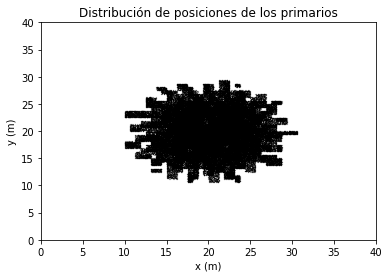

In [4]:
x = df['x (m)']
y = df['y (m)']
# size and color:
sizes = 0.02

# plot
fig, ax = plt.subplots()

ax.scatter(x, y, s=sizes, c='k')

ax.set(xlim=(0, 40), ylim=(0, 40))
ax.set_ylabel('y (m)')
ax.set_xlabel('x (m)')
ax.set_title('Distribución de posiciones de los primarios')

plt.show()

### Distribución de energía por partícula

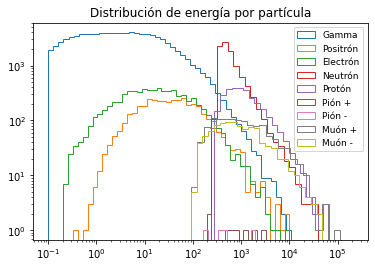

In [5]:
gamma = df[df['ID']=='gamma']
positron = df[df['ID'] == 'positron']
electron = df[df['ID']=='electron']
neutron = df[df['ID']=='neutron']
proton = df[df['ID'] == 'proton']
pion_p = df[df['ID'] == 'pion_p']
pion_m = df[df['ID'] == 'pion_m']
muon_p = df[df['ID'] == 'muon_p']
muon_m = df[df['ID'] == 'muon_m']



plt.hist(gamma['E (MeV)'], np.logspace(np.log10(0.1),np.log10(14000), 50), alpha = 1, label='Gamma', histtype='step')
plt.hist(positron['E (MeV)'], np.logspace(np.log10(0.1),np.log10(10000), 50), alpha = 1, label='Positrón',histtype='step')
plt.hist(electron['E (MeV)'], np.logspace(np.log10(0.1),np.log10(10000), 50),alpha = 1, label='Electrón', histtype='step')
plt.hist(neutron['E (MeV)'], np.logspace(np.log10(0.1),np.log10(50000), 50), alpha = 1, label='Neutrón', histtype='step')
plt.hist(proton['E (MeV)'], np.logspace(np.log10(0.1),np.log10(66000), 50), alpha = 1, label='Protón', histtype='step')
plt.hist(pion_p['E (MeV)'], bins=np.logspace(np.log10(0.1),np.log10(4000), 50), alpha = 1, label='Pión +', histtype='step')
plt.hist(pion_m['E (MeV)'], bins=np.logspace(np.log10(0.1),np.log10(6000), 50), alpha = 1, label='Pión -', histtype='step')
plt.hist(muon_p['E (MeV)'], bins=np.logspace(np.log10(0.1),np.log10(204000), 50), alpha = 1, label='Muón +', histtype='step')
plt.hist(muon_m['E (MeV)'], bins=np.logspace(np.log10(0.1),np.log10(63000), 50), alpha = 1, label='Muón -', histtype='step')


params = {'legend.fontsize': 9}

plt.rcParams.update(params)


plt.legend(loc='upper right')
plt.gca().set_xscale("log")
plt.gca().set_yscale("log")
plt.title('Distribución de energía por partícula')

plt.show()

### Distribución de ángulos cenitales

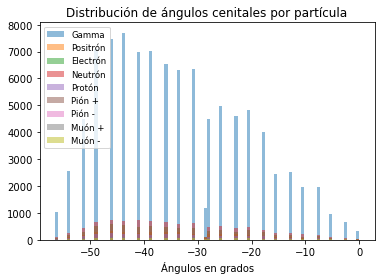

In [6]:
# Cálculo de ángulos

df['angulo_cenital'] = np.sqrt(df['px']**2+df['py']**2) / df['pz'] 

df['angulo_cenital'] = np.arctan(df['angulo_cenital'])

# Los ángulos son calculados en radianes, por tanto se convierten en grados
df['angulo_cenital'] = np.degrees(df['angulo_cenital'])


###########################################################################
# Histograma 
gamma = df[df['ID']=='gamma']
positron = df[df['ID'] == 'positron']
electron = df[df['ID']=='electron']
neutron = df[df['ID']=='neutron']
proton = df[df['ID'] == 'proton']
pion_p = df[df['ID'] == 'pion_p']
pion_m = df[df['ID'] == 'pion_m']
muon_p = df[df['ID'] == 'muon_p']
muon_m = df[df['ID'] == 'muon_m']



plt.hist(gamma['angulo_cenital'], 100, alpha = 0.5, label='Gamma')
plt.hist(positron['angulo_cenital'], 100, alpha = 0.5, label='Positrón')
plt.hist(electron['angulo_cenital'], 100,alpha = 0.5, label='Electrón')
plt.hist(neutron['angulo_cenital'], 100, alpha = 0.5, label='Neutrón')
plt.hist(proton['angulo_cenital'], 100, alpha = 0.5, label='Protón')
plt.hist(pion_p['angulo_cenital'], 100, alpha = 0.5, label='Pión +')
plt.hist(pion_m['angulo_cenital'], 100, alpha = 0.5, label='Pión -')
plt.hist(muon_p['angulo_cenital'], 100, alpha = 0.5, label='Muón +')
plt.hist(muon_m['angulo_cenital'], 100, alpha = 0.5, label='Muón -')


params = {'legend.fontsize': 8.5}

plt.rcParams.update(params)

plt.legend(loc='upper left')
plt.xlabel('Ángulos en grados')
plt.title('Distribución de ángulos cenitales por partícula')

plt.show()

### Distribución de ángulos acimutales

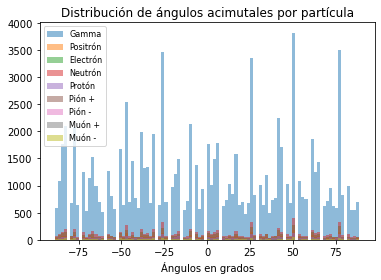

In [7]:
# Cálculo de ángulos

df['angulo_acimut'] = np.arctan(df['py'] / df['px']) 

# Los ángulos son calculados en radianes, por tanto se convierten en grados
df['angulo_acimut'] = np.degrees(df['angulo_acimut'])


###########################################################################
# Histograma 
gamma = df[df['ID']=='gamma']
positron = df[df['ID'] == 'positron']
electron = df[df['ID']=='electron']
neutron = df[df['ID']=='neutron']
proton = df[df['ID'] == 'proton']
pion_p = df[df['ID'] == 'pion_p']
pion_m = df[df['ID'] == 'pion_m']
muon_p = df[df['ID'] == 'muon_p']
muon_m = df[df['ID'] == 'muon_m']



plt.hist(gamma['angulo_acimut'], 100, alpha = 0.5, label='Gamma')
plt.hist(positron['angulo_acimut'], 100, alpha = 0.5, label='Positrón')
plt.hist(electron['angulo_acimut'], 100,alpha = 0.5, label='Electrón')
plt.hist(neutron['angulo_acimut'], 100, alpha = 0.5, label='Neutrón')
plt.hist(proton['angulo_acimut'], 100, alpha = 0.5, label='Protón')
plt.hist(pion_p['angulo_acimut'], 100, alpha = 0.5, label='Pión +')
plt.hist(pion_m['angulo_acimut'], 100, alpha = 0.5, label='Pión -')
plt.hist(muon_p['angulo_acimut'], 100, alpha = 0.5, label='Muón +')
plt.hist(muon_m['angulo_acimut'], 100, alpha = 0.5, label='Muón -')


params = {'legend.fontsize': 8}

plt.rcParams.update(params)


plt.legend(loc='upper left')
plt.xlabel('Ángulos en grados')
plt.title('Distribución de ángulos acimutales por partícula')

plt.show()

## Generando el archivo

### Matriz de rotación

Se hace coincidir el sistema de referencia de los datos con el de Geant4 haciendo uso de una matriz de rotación.

Sistema de referencia de los datos de entrada: 
![Sistema de referencia en Corsika](Imagenes/sist-corsika.png)
Sistema de referencia en Geant4:
![Sistema de Referencia Geant4](Imagenes/sist-geant4.png)

#### Matriz de Rotación dejando el eje x fijo

\begin{equation}
    R(x,\beta)=
    \begin{bmatrix}
        1 & 0 & 0\\
        0 & \cos{\beta} & -\sin{\beta} \\
        0 & \sin{\beta} & \cos{\beta}
    \end{bmatrix}
\end{equation}

Con $\beta = 90^{\circ}$. Por lo que quedaría: 

\begin{equation}
    R(x,90^{\circ})=
    \begin{bmatrix}
        1 & 0 & 0 \\
        0 & 0 & -1 \\
        0 & 1 & 0
    \end{bmatrix}
\end{equation}


In [8]:
# Se aplica la matriz de rotación
df['x_r (m)'] = df['x (m)']
df['y_r (m)'] = df['z (m)']
df['z_r (m)'] = -1 * df['y (m)']

df['px_r'] = df['px']
df['py_r'] = df['pz']
df['pz_r'] = -1 * df['py']

# Se eliminan las coordenadas de momento y posición originales
df = df.drop(['px', 'py', 'pz', 'x (m)', 'y (m)', 'z (m)', 'angulo_cenital', 'angulo_acimut'], axis=1)

### Traslación de plano de inyección

Se traslada el plano de inyección hasta la posición tangente con la parte superior de la geometría de la nave.

Por ejemplo, en una nave esférica de radio 7 m, centrada en el origen, el plano debe ser desplazado 7m en dirección vertical (ver ejemplo aeronaveEsferica.txt).

In [9]:
df['y_r (m)'] = 7
df.head()

ID   E (MeV)    x_r (m)  y_r (m)    z_r (m)      px_r      py_r  \
0  gamma  0.046237  13.416617        7 -19.173292  0.655749 -0.753071   
1  gamma  0.048951  13.969443        7 -23.128802  0.580645 -0.753071   
2  gamma  0.048017  18.825314        7 -20.418640  0.085657 -0.995974   
3  gamma  0.044912  19.868081        7 -14.968621  0.014097 -0.722795   
4  gamma  0.044741  21.944240        7 -23.175150 -0.253277 -0.900969   

       pz_r  
0 -0.053628  
1  0.309410  
2  0.026422  
3 -0.690919  
4  0.352287

### Crear archivo .mac
El archivo es un macro que especifica nombre, posición, dirección y energía de cada patícula.

#### Conocer las partículas presentes

In [10]:
df['ID'].value_counts()

gamma       98584
neutron      9599
electron     6979
positron     3972
proton       2951
muon_p       1165
muon_m        999
pion_p         12
pion_m          8
Name: ID, dtype: int64

#### Selección de la partícula

Se selecciona la partícula de interés y se obtiene la energía promedio.

In [35]:
df_particula = df[df['ID']=='muon_m'].reset_index()

#Estableciendo la partícula
particula = df_particula['ID'][1]

# Energía promedio de las patículas
energia_promedio = df_particula['E (MeV)'].mean() 

#Número de partículas
numero_particulas = len(df_particula)

#### Identificación de las partículas

ID | Partícula | Identificación en Geant4
:--------: | ------- |-------
gamma | Gamma | gamma
positron | Positrón | e+ 
electron | Electrón | e- 
proton | Protón | proton
neutron | Neutrón |  neutron
muon_p | Muon + | mu+
muon_n | Muon - | mu- 
pion_p | Pion + | pi+
pion_m | Pion - | pi-


In [36]:
# Estableciendo compatibilidad entre los nombres de las partículas en Corsika y Geant4 

if particula == 'positron':
    particula = 'e+'
elif particula == 'electron':
    particula = 'e-'
elif particula == 'muon_p':
    particula = 'mu+'
elif particula == 'muon_m':
    particula = 'mu-'
    
print(particula)

mu-


#### Generar archivos de texto

In [37]:
data = open('Output/NY-Tokio/muon_m.mac', 'a')
data.write('############'+'\n')
data.write('# Macro'+'\n')
data.write('#'+'\n')
data.write('# Muestra de datos sinteticos'+'\n')
data.write('# Inicializar kernel'+'\n')
data.write('/run/initialize'+'\n')
data.write('#'+'\n')
data.write('/control/verbose 2'+'\n')
data.write('/tracking/verbose 2'+'\n')
data.write('#'+'\n')

2

#### Se recupera la información necesaria para llenar el archivo de texto

Se simplifican los datos inyectando las partículas verticalmente hacia abajo y desde el plano de inyección. Por ejemplo, en una nave esférica de radio 7 m, centrada en el origen, el plano de inyección debe ser desplazado 7m en dirección vertical (ver ejemplo aeronaveEsferica.txt).

In [38]:
data.write('/gun/particle '+str(particula)+'\n')
data.write('/gun/energy '+str(energia_promedio)+' '+'MeV'+'\n')  
data.write('/gun/position 0 7 0 '+ 'm'+'\n')
data.write('/gun/direction 0 1 0'+'\n')
data.write('/run/beamOn '+str(numero_particulas)+'\n')
data.write('#'+'\n')

data.close()
